In [1]:
#####################
#     VT Ploting    #
#####################
#  yliu301@iit.edu  #
#####################
#   plotvtm.ipynb   #
#    Version 1.0    #
#####################

In [2]:
import re
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import time
import operator

In [3]:
def matchDate(line):
    matchThis = ""
    matched = re.match(r'\d\d\d\d-\d\d-\d\d\ \d\d:\d\d:\d\d',line)
    if matched:
        #matches a date and adds it to matchThis            
        matchThis = matched.group() 
    else:
        matchThis = "NONE"
    return matchThis


def generateDicts(log_fh):
    """
    Arg:
    log_fh...file
    Return:
    currentDict..dict
    """
    currentDict = {}
    for line in log_fh:
        if line.startswith(matchDate(line)):
            if currentDict:
                yield currentDict
            currentDict = {"date":line.split("__")[0][:23],"type":line.split("-",5)[3],"text":line.split("-",5)[-1].rstrip()}
        else:
            currentDict["text"] += line
    yield currentDict


vtmfiles = ['vmgm_80.log', 'vmgm_189.log'] # Put vtmg files
list_parsed_files = []
for i, f in enumerate(vtmfiles):
    with open(f) as f:
        listNew= list(generateDicts(f)) # list contains dict
        print f
        print listNew[0] # Start date
        print listNew[1] # Start Connection Manager
        print listNew[2] # Start Host Activities
    list_parsed_files.append(listNew)


with open('vmgm_1.log') as f:
    vt_hun = list(generateDicts(f)) # list contains dict
    print f
    print vt_hun[0] # Start date
    print vt_hun[1] # Start Connection Manager
    print vt_hun[2] # Start Host Activities
    
with open('vmgm_2.log') as f:
    vt_hun2 = list(generateDicts(f)) # list contains dict
    print f
    print vt_hun2[0] # Start date
    print vt_hun2[1] # Start Connection Manager
    print vt_hun2[2] # Start Host Activities

<open file 'vmgm_80.log', mode 'r' at 0x103ba6ed0>
{'date': '2018-03-26 11:37:00,757', 'text': ' Starting Service ID: #2', 'type': ' root '}
{'date': '2018-03-26 11:37:00,770', 'text': ' Connection Manager Started: 1522082220.768925905', 'type': ' root '}
{'date': '2018-03-26 11:37:00,781', 'text': ' Host Activities Started: 1522082220.780319929', 'type': ' root '}
<open file 'vmgm_189.log', mode 'r' at 0x103ba6ed0>
{'date': '2018-03-26 11:37:00,302', 'text': ' Starting Service ID: #1', 'type': ' root '}
{'date': '2018-03-26 11:37:00,315', 'text': ' Connection Manager Started: 1522082220.313647985', 'type': ' root '}
{'date': '2018-03-26 11:37:00,325', 'text': ' Host Activities Started: 1522082220.324775934', 'type': ' root '}
<open file 'vmgm_1.log', mode 'r' at 0x103ba6f60>
{'date': '2018-04-12 12:33:00,933', 'text': ' Starting Service ID: #1', 'type': ' root '}
{'date': '2018-04-12 12:33:00,947', 'text': ' Connection Manager Started: 1523554380.945696115', 'type': ' root '}
{'date':

In [4]:
_datetime_format = "%Y-%m-%d %H:%M:%S"
_dmesg_line_regex = re.compile("^\[\s*(?P<time>\d+\.\d+)\](?P<line>.*)$")
dmgfiles = ['dmesg_80.log', 'dmesg_189.log']

list_dmgFiles = [] # list in list

for i, f in enumerate(dmgfiles):
    with open(f) as dmesg_data:
        list_parsedMsg = []
        for line in dmesg_data:
            if not line:
                continue
            match = _dmesg_line_regex.match(line)
            if match:
                try:
                    # seconds = int(match.groupdict().get('time', '').split('.')[0])
                    #nanoseconds = int(match.groupdict().get('time', '').split('.')[1])
                    # microseconds = int(round(nanoseconds * 0.001))
                    line = match.groupdict().get('line', '')
                    list_parsedMsg.append(line.split())
                    # t = timedelta(seconds=seconds, microseconds=microseconds)
                except IndexError:
                    pass
        
        list_dmgFiles.append(list_parsedMsg)
print "Sample (First file first line): ", list_dmgFiles[0][0]
### For 100
dmgfiles_H = ['dmesg_1.log', 'dmesg_2.log']

list_dmgFiles_H = [] # list in list

for i, f in enumerate(dmgfiles_H):
    with open(f) as dmesg_data:
        list_parsedMsg = []
        for line in dmesg_data:
            if not line:
                continue
            match = _dmesg_line_regex.match(line)
            if match:
                try:
                    # seconds = int(match.groupdict().get('time', '').split('.')[0])
                    #nanoseconds = int(match.groupdict().get('time', '').split('.')[1])
                    # microseconds = int(round(nanoseconds * 0.001))
                    line = match.groupdict().get('line', '')
                    list_parsedMsg.append(line.split())
                    # t = timedelta(seconds=seconds, microseconds=microseconds)
                except IndexError:
                    pass
        
        list_dmgFiles_H.append(list_parsedMsg)
print "Sample (First file first line): ", list_dmgFiles_H[0][0]

Sample (First file first line):  ['VT-GPIO_TEST:', 'Initializing', 'the', 'Virtual', 'Time', 'GPIO_TEST', 'LKM']
Sample (First file first line):  ['VT-GPIO_TEST:', 'Initializing', 'the', 'Virtual', 'Time', 'GPIO_TEST', 'LKM']


Pi_ 1 : 
Start time for NetCoor:  1522082220.768925905
Start time for HostAct:  1522082220.780319929
Pi_ 2 : 
Start time for NetCoor:  1522082220.313647985
Start time for HostAct:  1522082220.324775934


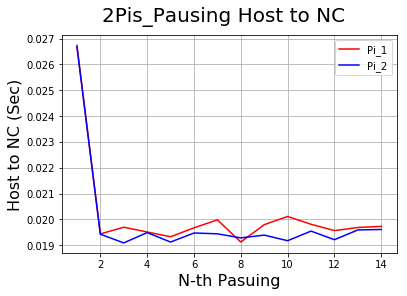

In [5]:
# Graph of pause by HA to NC: Pause time - start time
colors = ['r', 'b', 'g', 'k', 'm']
fig = plt.figure()
fig.suptitle(str(len(list_parsed_files)) +'Pis_Pausing Host to NC', fontsize=20)
axis = plt.gca().xaxis
leg_list = []

for i, fd in enumerate(list_parsed_files):
    list_of_wait_time = []
    start_time_NC = fd[1]["text"].split(': ')[1]
    start_time_HA = fd[2]["text"].split(': ')[1]
    print 'Pi_', i+1,': '
    print 'Start time for NetCoor: ', start_time_NC
    print 'Start time for HostAct: ', start_time_HA
    
    x = [float(item["text"].split()[1]) - float(start_time_HA) for item in fd[3:] if item["text"].split()[0] == "Host_System_pasuing:"]
    y = [float(item["text"].split()[1]) - float(start_time_NC) for item in fd[3:] if item["text"].split()[0] == "NCProcHandler_Stop_Services:"]

    #ncstops =  [float(item["text"].split()[1]) for item in fd[3:] if item["text"].split()[0] == "NetCoor_Stop_Services:"]
    #ncresumes =  [float(item["text"].split()[1]) for item in fd[3:] if item["text"].split()[0] == "NetCoor_Resume_Services:"]
    #list_of_wait_time = map(operator.sub, ncresumes, ncstops)
    
    
    y2 = map(operator.sub, y, x)    
    x2 = [ind+1 for ind in range(len(y))]
    leg_list.append('Pi_'+str(i+1))
    plt.plot(x2, y2, color=colors[i])

#for label in axis.get_ticklabels():
#    label.set_rotation(90)
plt.xlabel('N-th Pasuing', fontsize=16)
plt.ylabel('Host to NC (Sec)', fontsize=16)
plt.legend(leg_list)
plt.grid(True)
plt.show()
#plt.savefig(output_filename, format='eps')

Pi_ 1 : 
Start time for NetCoor:  1522082220.768925905
Start time for HostAct:  1522082220.780319929
Pi_ 2 : 
Start time for NetCoor:  1522082220.313647985
Start time for HostAct:  1522082220.324775934


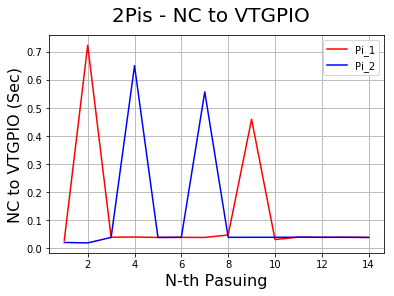

In [6]:
# Graph of pause by NC to VTGPIO: Pause time
fig = plt.figure()
fig.suptitle(str(len(list_parsed_files)) +'Pis - NC to VTGPIO', fontsize=20)
axis = plt.gca().xaxis
leg_list = []
for i, fd in enumerate(list_parsed_files):
    start_time_NC = fd[1]["text"].split(': ')[1]
    start_time_HA = fd[2]["text"].split(': ')[1]
    print 'Pi_', i+1,': '
    print 'Start time for NetCoor: ', start_time_NC
    print 'Start time for HostAct: ', start_time_HA
    
    x = [float(item["text"].split()[1]) for item in fd[3:] if item["text"].split()[0] == "NCProcHandler_Stop_Services:"]
    y = []
    for i2, item in enumerate(list_dmgFiles[i]):
        if i2 > 0:
            if list_dmgFiles[i][i2-1][-1] == 'pause':
                y.append(float(item[-3] + '.' + item[-2]))

    y2 = map(operator.sub, y, x)    
    x2 = [ind+1 for ind in range(len(y))]
    leg_list.append('Pi_'+str(i+1))
    plt.plot(x2, y2, color=colors[i])
    
plt.xlabel('N-th Pasuing', fontsize=16)
plt.ylabel('NC to VTGPIO (Sec)', fontsize=16)
plt.legend(leg_list)
plt.grid(True)
plt.show()

Pi_ 1 : 
Start time for NetCoor:  1522082220.768925905
Pi_ 2 : 
Start time for NetCoor:  1522082220.313647985


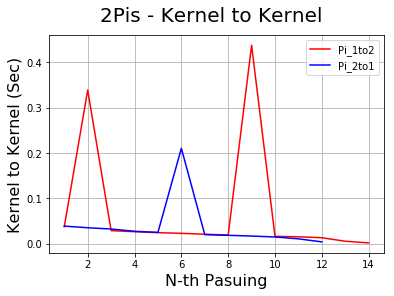

In [9]:
# Graph of pause by Kernel to Kernel: Pause time
# For 2 Pis only
fig = plt.figure()
fig.suptitle(str(len(list_parsed_files)) +'Pis - Kernel to Kernel', fontsize=20)
axis = plt.gca().xaxis
leg_list = []
y_dict = {}
t = []
for i, fd in enumerate(list_parsed_files):
    start_time_NC = fd[1]["text"].split(': ')[1]
    print 'Pi_', i+1,': '
    print 'Start time for NetCoor: ', start_time_NC
    t.append(float(start_time_NC))

dt = t[0] - t[1]
if t[0] - t[1] < 0:
    dt = t[1] - t[0]

for i, fd in enumerate(list_dmgFiles):
    y_SelfPause=[]
    y_otherPause=[]
    for ind, ln in enumerate(fd):
        if ind > 0 and ln[1] == 'TIME-RISE:':
            if fd[ind-1][-1] == 'pause':
                y_SelfPause.append(float(ln[-3] + '.' + ln[-2]))
            elif fd[ind+1][1] == 'Rising':
                y_otherPause.append(float(ln[-3] + '.' + ln[-2]))
                    

    y_dict[str(i)+"-self"] = y_SelfPause
    y_dict[str(i)+"-other"] = y_otherPause


y2 = map(operator.sub, y_dict["0-self"], y_dict["1-other"])
#y2 = [(n * -1) for n in y2 if n <0]
x2 = [ind+1 for ind in range(len(y2))]
leg_list.append('Pi_1to2')
plt.plot(x2, y2, color=colors[0])

y2 = map(operator.sub, y_dict["1-self"], y_dict["0-other"])
y2 = [(n * -1) for n in y2 if n <0]
x2 = [ind+1 for ind in range(len(y2))]
leg_list.append('Pi_2to1'+str())
plt.plot(x2, y2, color=colors[1])
    
plt.xlabel('N-th Pasuing', fontsize=16)
plt.ylabel('Kernel to Kernel (Sec)', fontsize=16)
plt.legend(leg_list)
plt.grid(True)
plt.show()


Pi_ 1 : 
Start time for NetCoor:  1523554380.945696115
Start time for HostAct:  1523554380.956871986
Pi_ 1 : 
Start time for NetCoor:  1523554380.945696115
Start time for HostAct:  1523554380.956871986
157


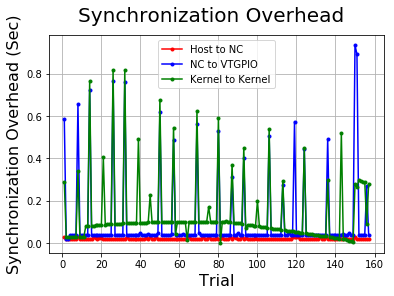

In [5]:
# !00th attempts starts from here
# Graph of pause by HA to NC: Pause time - start time 100attemt
colors = ['r', 'b', 'g', 'k', 'm']
fig = plt.figure()
fig.suptitle('Synchronization Overhead', fontsize=20)
axis = plt.gca().xaxis
leg_list = []
# using list vt_hun
for i, fd in enumerate([vt_hun]):
    list_of_wait_time = []
    start_time_NC = fd[1]["text"].split(': ')[1]
    start_time_HA = fd[2]["text"].split(': ')[1]
    print 'Pi_', i+1,': '
    print 'Start time for NetCoor: ', start_time_NC
    print 'Start time for HostAct: ', start_time_HA
    
    x = [float(item["text"].split()[1]) - float(start_time_HA) for item in fd[3:] if item["text"].split()[0] == "Host_System_pasuing:"]
    y = [float(item["text"].split()[1]) - float(start_time_NC) for item in fd[3:] if item["text"].split()[0] == "NCProcHandler_Stop_Services:"]

    #ncstops =  [float(item["text"].split()[1]) for item in fd[3:] if item["text"].split()[0] == "NetCoor_Stop_Services:"]
    #ncresumes =  [float(item["text"].split()[1]) for item in fd[3:] if item["text"].split()[0] == "NetCoor_Resume_Services:"]
    #list_of_wait_time = map(operator.sub, ncresumes, ncstops)
    
    
    y2 = map(operator.sub, y, x)    
    x2 = [ind+1 for ind in range(len(y))]
    plt.plot(x2, y2, '.-', color=colors[0])

leg_list.append('Host to NC')
    
# Graph of pause by NC to VTGPIO: Pause time 100

start_time_NC = vt_hun[1]["text"].split(': ')[1]
start_time_HA = vt_hun[2]["text"].split(': ')[1]
print 'Pi_', i+1,': '
print 'Start time for NetCoor: ', start_time_NC
print 'Start time for HostAct: ', start_time_HA
    
x = [float(item["text"].split()[1]) for item in fd[3:] if item["text"].split()[0] == "NCProcHandler_Stop_Services:"]
y = []
print len(x)

for i2, item in enumerate(list_dmgFiles_H[0]):
    if i2 > 0:
        if list_dmgFiles_H[0][i2-1][-1] == 'pause':
            y.append(float(item[-3] + '.' + item[-2]))

y2 = map(operator.sub, y, x)    
x2 = [ind+1 for ind in range(len(y))]
plt.plot(x2, y2, '.-', color=colors[1])

leg_list.append('NC to VTGPIO')
    
# Kernel 2 kernel
y_dict = {}
t = []
for fd in [vt_hun, vt_hun2]:
    start_time_NC = fd[1]["text"].split(': ')[1]
    t.append(float(start_time_NC))

dt = t[0] - t[1]
if t[0] - t[1] < 0:
    dt = t[1] - t[0]

for i, fd in enumerate(list_dmgFiles_H):
    y_SelfPause=[]
    y_otherPause=[]
    for ind, ln in enumerate(fd):

        if ind > 0 and ln[1] == 'TIME-RISE:':
            if fd[ind-1][-1] == 'pause':
                y_SelfPause.append(float(ln[-3] + '.' + ln[-2]))
            elif fd[ind+1][1] == 'Rising':
                y_otherPause.append(float(ln[-3] + '.' + ln[-2]))
                    

    y_dict[str(i)+"-self"] = y_SelfPause
    y_dict[str(i)+"-other"] = y_otherPause


y2 = map(operator.sub, y_dict["0-self"], y_dict["1-other"])
y3=[]
for n in y2:
    if n <0:
        n+=dt 
    y3.append(abs(n))
        
x2 = [ind+1 for ind in range(len(y3))]
plt.plot(x2, y3, '.-', color=colors[2])
leg_list.append('Kernel to Kernel')
    
#for label in axis.get_ticklabels():
#    label.set_rotation(90)
plt.xlabel('Trial', fontsize=16)
plt.ylabel('Synchronization Overhead (Sec)', fontsize=16)
plt.legend(leg_list)
plt.grid(True)
plt.savefig('synchronization overhead.png')
plt.show()

Pi_ 1 : 
Start time for NetCoor:  1523554380.945696115
Start time for HostAct:  1523554380.956871986


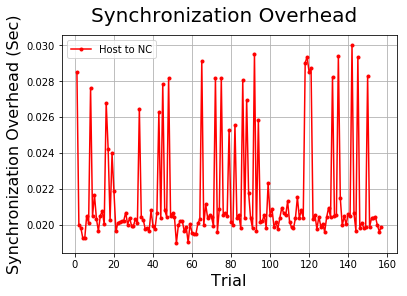

In [11]:
# Graph of pause by NC to VTGPIO: Pause time 100
# !00th attempts starts from here
# Graph of pause by HA to NC: Pause time - start time 100attemt
colors = ['r', 'b', 'g', 'k', 'm']
fig = plt.figure()
fig.suptitle('Synchronization Overhead', fontsize=20)
axis = plt.gca().xaxis
leg_list = []
# using list vt_hun
for i, fd in enumerate([vt_hun]):
    list_of_wait_time = []
    start_time_NC = fd[1]["text"].split(': ')[1]
    start_time_HA = fd[2]["text"].split(': ')[1]
    print 'Pi_', i+1,': '
    print 'Start time for NetCoor: ', start_time_NC
    print 'Start time for HostAct: ', start_time_HA
    
    x = [float(item["text"].split()[1]) - float(start_time_HA) for item in fd[3:] if item["text"].split()[0] == "Host_System_pasuing:"]
    y = [float(item["text"].split()[1]) - float(start_time_NC) for item in fd[3:] if item["text"].split()[0] == "NCProcHandler_Stop_Services:"]

    #ncstops =  [float(item["text"].split()[1]) for item in fd[3:] if item["text"].split()[0] == "NetCoor_Stop_Services:"]
    #ncresumes =  [float(item["text"].split()[1]) for item in fd[3:] if item["text"].split()[0] == "NetCoor_Resume_Services:"]
    #list_of_wait_time = map(operator.sub, ncresumes, ncstops)
    
    
    y2 = map(operator.sub, y, x)    
    x2 = [ind+1 for ind in range(len(y))]
    plt.plot(x2, y2, '.-', color=colors[0])

leg_list.append('Host to NC')
#for label in axis.get_ticklabels():
#    label.set_rotation(90)
plt.xlabel('Trial', fontsize=16)
plt.ylabel('Synchronization Overhead (Sec)', fontsize=16)
plt.legend(leg_list)
plt.grid(True)
plt.savefig("Synchronization Overhead (Host to NC).png")
plt.show()

Pi_ 1 : 
Start time for NetCoor:  1523554380.945696115
Start time for HostAct:  1523554380.956871986
157


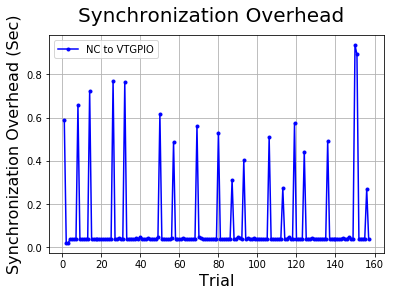

In [8]:
# Graph of pause by NC to VTGPIO: Pause time 100
# !00th attempts starts from here
# Graph of pause by HA to NC: Pause time - start time 100attemt
colors = ['r', 'b', 'g', 'k', 'm']
fig = plt.figure()
fig.suptitle('Synchronization Overhead', fontsize=20)
axis = plt.gca().xaxis
leg_list = []
start_time_NC = vt_hun[1]["text"].split(': ')[1]
start_time_HA = vt_hun[2]["text"].split(': ')[1]
print 'Pi_', i+1,': '
print 'Start time for NetCoor: ', start_time_NC
print 'Start time for HostAct: ', start_time_HA
    
x = [float(item["text"].split()[1]) for item in fd[3:] if item["text"].split()[0] == "NCProcHandler_Stop_Services:"]
y = []
print len(x)

for i2, item in enumerate(list_dmgFiles_H[0]):
    if i2 > 0:
        if list_dmgFiles_H[0][i2-1][-1] == 'pause':
            y.append(float(item[-3] + '.' + item[-2]))

y2 = map(operator.sub, y, x)    
x2 = [ind+1 for ind in range(len(y))]

plt.plot(x2, y2, '.-', color=colors[1])

leg_list.append('NC to VTGPIO')
    
    
#for label in axis.get_ticklabels():
#    label.set_rotation(90)
plt.xlabel('Trial', fontsize=16)
plt.ylabel('Synchronization Overhead (Sec)', fontsize=16)
plt.legend(leg_list)
plt.grid(True)
plt.savefig("Synchronization Overhead (NC to VTGPIO).png")
plt.show()

Start time for NetCoor:  1523554380.945696115
Start time for NetCoor:  1523554380.639564991
157


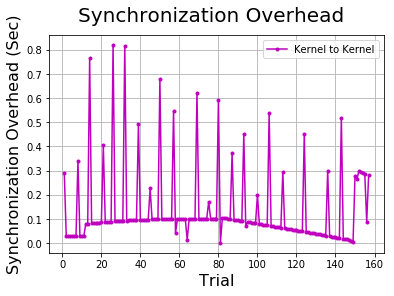

In [6]:
# Graph of pause by Kernel to Kernel: Pause time
# For 2 Pis only
colors = ['r', 'b', 'g', 'k', 'm']
fig = plt.figure()
fig.suptitle('Synchronization Overhead', fontsize=20)
axis = plt.gca().xaxis
leg_list = []
y_dict = {}
t = []
for fd in [vt_hun, vt_hun2]:
    start_time_NC = fd[1]["text"].split(': ')[1]
    print 'Start time for NetCoor: ', start_time_NC
    t.append(float(start_time_NC))

dt = t[0] - t[1]
if t[0] - t[1] < 0:
    dt = t[1] - t[0]

for i, fd in enumerate(list_dmgFiles_H):
    y_SelfPause=[]
    y_otherPause=[]
    for ind, ln in enumerate(fd):

        if ind > 0 and ln[1] == 'TIME-RISE:':
            if fd[ind-1][-1] == 'pause':
                y_SelfPause.append(float(ln[-3] + '.' + ln[-2]))
            elif fd[ind+1][1] == 'Rising':
                y_otherPause.append(float(ln[-3] + '.' + ln[-2]))
                    

    y_dict[str(i)+"-self"] = y_SelfPause
    y_dict[str(i)+"-other"] = y_otherPause


y2 = map(operator.sub, y_dict["0-self"], y_dict["1-other"])
y3=[]
for n in y2:
    if n <0:
        n+=dt 
    y3.append(abs(n))
        
print len(y3)
leg_list.append('Kernel to Kernel')
x2 = [ind+1 for ind in range(len(y3))]
plt.plot(x2, y3, '.-', color=colors[4])

plt.xlabel('Trial', fontsize=16)
plt.ylabel('Synchronization Overhead (Sec)', fontsize=16)
plt.legend(leg_list)
plt.grid(True)
plt.savefig("Synchronization Overhead (Kernel to kernel).png")
plt.show()

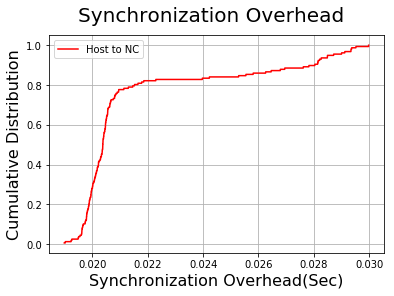

In [7]:
colors = ['r', 'b', 'g', 'k', 'm']
fig = plt.figure()
fig.suptitle('Synchronization Overhead', fontsize=20)
axis = plt.gca().xaxis
leg_list = []

Z = []
for i, fd in enumerate([vt_hun]): # host2NC
    list_of_wait_time = []
    start_time_NC = fd[1]["text"].split(': ')[1]
    start_time_HA = fd[2]["text"].split(': ')[1]
    
    x = [float(item["text"].split()[1]) - float(start_time_HA) for item in fd[3:] if item["text"].split()[0] == "Host_System_pasuing:"]
    y = [float(item["text"].split()[1]) - float(start_time_NC) for item in fd[3:] if item["text"].split()[0] == "NCProcHandler_Stop_Services:"]

    #ncstops =  [float(item["text"].split()[1]) for item in fd[3:] if item["text"].split()[0] == "NetCoor_Stop_Services:"]
    #ncresumes =  [float(item["text"].split()[1]) for item in fd[3:] if item["text"].split()[0] == "NetCoor_Resume_Services:"]
    #list_of_wait_time = map(operator.sub, ncresumes, ncstops)
    
    y2 = map(operator.sub, y, x)  
    Z = y2
    x2 = [ind+1 for ind in range(len(y))]

    leg_list.append('Host to NC')
    # Plot
    H,X1 = np.histogram( Z, bins = 5000, normed = True)
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    plt.plot(X1[1:], F1, color=colors[0])

    


""" 
y_dict = {}
t = []
for fd in [vt_hun, vt_hun2]: # kernel2kernel
    start_time_NC = fd[1]["text"].split(': ')[1]
    t.append(float(start_time_NC))

dt = t[0] - t[1]
if t[0] - t[1] < 0:
    dt = t[1] - t[0]

for i, fd in enumerate(list_dmgFiles_H):
    y_SelfPause=[]
    y_otherPause=[]
    for ind, ln in enumerate(fd):

        if ind > 0 and ln[1] == 'TIME-RISE:':
            if fd[ind-1][-1] == 'pause':
                y_SelfPause.append(float(ln[-3] + '.' + ln[-2]))
            elif fd[ind+1][1] == 'Rising':
                y_otherPause.append(float(ln[-3] + '.' + ln[-2]))
                    

    y_dict[str(i)+"-self"] = y_SelfPause
    y_dict[str(i)+"-other"] = y_otherPause


y2 = map(operator.sub, y_dict["0-self"], y_dict["1-other"])
y3=[]
for n in y2:
    if n <0:
        n+=dt 
    y3.append(abs(n))
        
leg_list.append('Kernel to Kernel')
# Plot
Z = y3
H,X1 = np.histogram( Z, bins = 5000, normed = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
plt.plot(X1[1:], F1, color=colors[2])
"""  
    
    
plt.xlabel('Synchronization Overhead(Sec)', fontsize=16)
plt.ylabel('Cumulative Distribution', fontsize=16)


plt.legend(leg_list)
plt.grid(True)
plt.savefig('synchronization overhead cdf1.png')
plt.show()

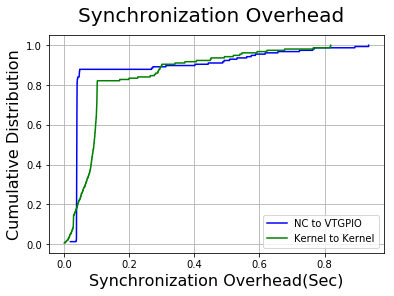

In [8]:
colors = ['r', 'b', 'g', 'k', 'm']
fig = plt.figure()
fig.suptitle('Synchronization Overhead', fontsize=20)
axis = plt.gca().xaxis
leg_list = []

# NC 2 GPIO
start_time_NC = vt_hun[1]["text"].split(': ')[1]
start_time_HA = vt_hun[2]["text"].split(': ')[1]
    
x = [float(item["text"].split()[1]) for item in fd[3:] if item["text"].split()[0] == "NCProcHandler_Stop_Services:"]
y = []


for i2, item in enumerate(list_dmgFiles_H[0]):
    if i2 > 0:
        if list_dmgFiles_H[0][i2-1][-1] == 'pause':
            y.append(float(item[-3] + '.' + item[-2]))

y2 = map(operator.sub, y, x)
Z = y2

leg_list.append('NC to VTGPIO')

# Plot
H,X1 = np.histogram( Z, bins = 5000, normed = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
plt.plot(X1[1:], F1, color=colors[1])

y_dict = {}
t = []
for fd in [vt_hun, vt_hun2]: # kernel2kernel
    start_time_NC = fd[1]["text"].split(': ')[1]
    t.append(float(start_time_NC))

dt = t[0] - t[1]
if t[0] - t[1] < 0:
    dt = t[1] - t[0]

for i, fd in enumerate(list_dmgFiles_H):
    y_SelfPause=[]
    y_otherPause=[]
    for ind, ln in enumerate(fd):

        if ind > 0 and ln[1] == 'TIME-RISE:':
            if fd[ind-1][-1] == 'pause':
                y_SelfPause.append(float(ln[-3] + '.' + ln[-2]))
            elif fd[ind+1][1] == 'Rising':
                y_otherPause.append(float(ln[-3] + '.' + ln[-2]))
                    

    y_dict[str(i)+"-self"] = y_SelfPause
    y_dict[str(i)+"-other"] = y_otherPause


y2 = map(operator.sub, y_dict["0-self"], y_dict["1-other"])
y3=[]
for n in y2:
    if n <0:
        n+=dt 
    y3.append(abs(n))
        
leg_list.append('Kernel to Kernel')
# Plot
Z = y3
H,X1 = np.histogram( Z, bins = 5000, normed = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
plt.plot(X1[1:], F1, color=colors[2])

    
    
plt.xlabel('Synchronization Overhead(Sec)', fontsize=16)
plt.ylabel('Cumulative Distribution', fontsize=16)


plt.legend(leg_list)
plt.grid(True)
plt.savefig('synchronization overhead cdf2.png')
plt.show()